# AceleraDev DataScience 

## Setup

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data




In [20]:
#lendo os pacotes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [152]:
df = pd.read_csv('train.csv')

## Analysis

### Selecao por completude

In [7]:
#Criando um dataframe auxliar para analisar a consistencia das variaveis
cons = pd.DataFrame({'colunas' : df.columns,
                    'tipo': df.dtypes,
                    'missing' : df.isna().sum(),
                    'size' : df.shape[0],
                    'unicos': df.nunique()})
cons['percentual'] = round(cons['missing'] / cons['size'],2)

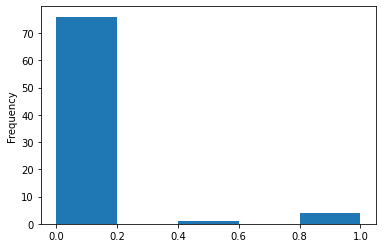

In [8]:
cons.percentual.plot.hist( bins = 5)

### Removendo colunas com dados missing

In [9]:
print('Contagem de colunas com ATÉ 20% de dados faltantes', cons[cons.percentual < 0.2].shape[0])
print('Contagem de colunas com 0% de dados faltantes',  cons[cons.percentual == 0].shape[0])

Contagem de colunas com ATÉ 20% de dados faltantes 76
Contagem de colunas com 0% de dados faltantes 63


In [10]:
cons[cons.percentual == 0]['tipo'].value_counts()

int64     35
object    28
Name: tipo, dtype: int64

In [11]:
cons['completa'] = ['completa' if x == 0 else 'faltante' for x in cons['percentual']]

In [13]:
mantem = list(cons[cons['completa'] == 'completa']['colunas'])
df = df[mantem]

In [17]:
colunas_numericas = list(cons[((cons['tipo'] != 'object') &
                              (cons['completa'] == 'completa'))]['colunas'])

## Exploração

Id


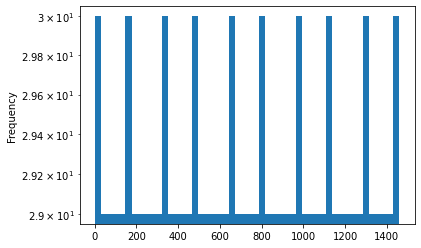

MSSubClass


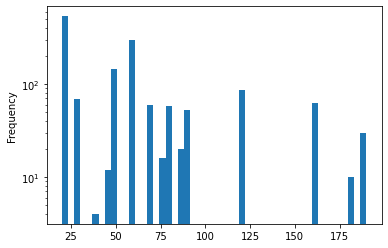

LotArea


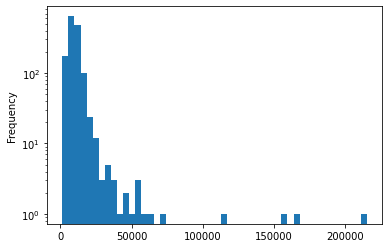

OverallQual


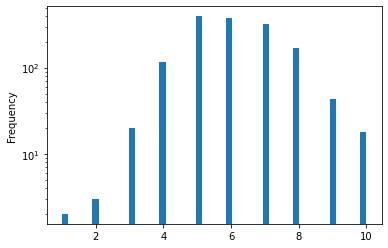

OverallCond


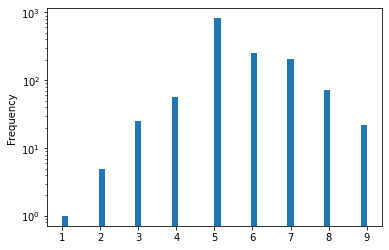

YearBuilt


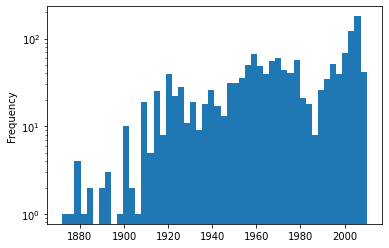

YearRemodAdd


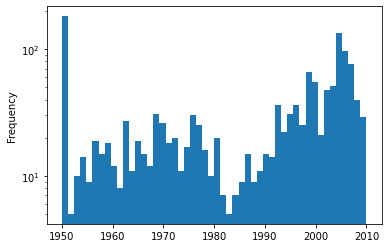

BsmtFinSF1


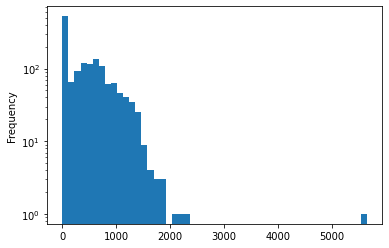

BsmtFinSF2


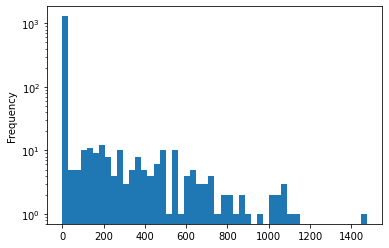

BsmtUnfSF


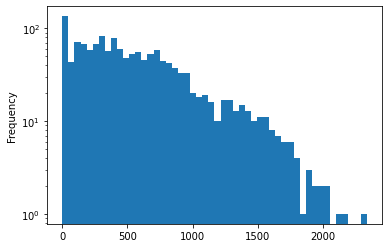

TotalBsmtSF


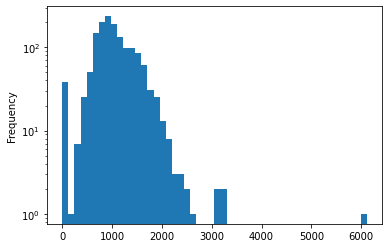

1stFlrSF


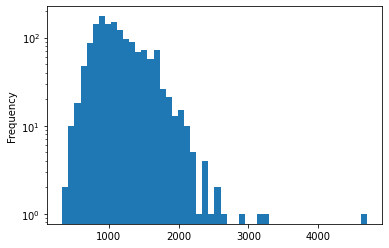

2ndFlrSF


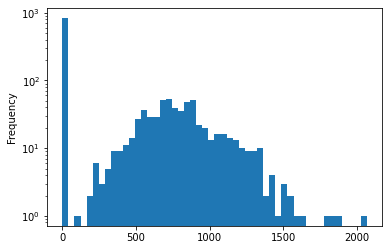

LowQualFinSF


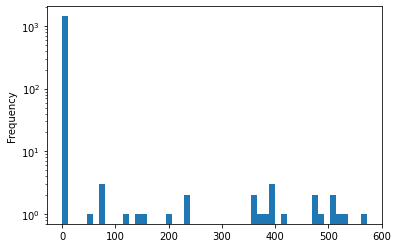

GrLivArea


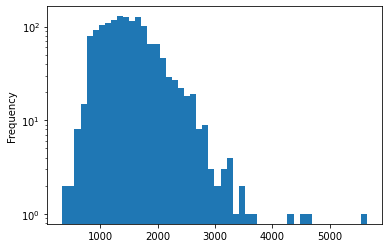

BsmtFullBath


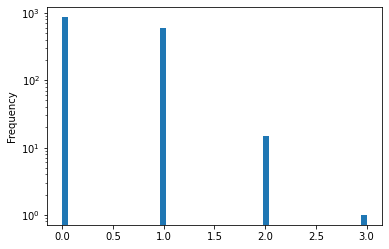

BsmtHalfBath


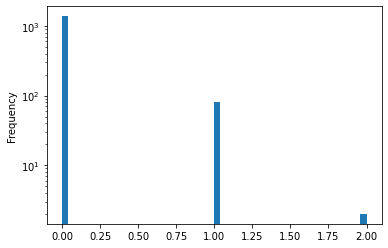

FullBath


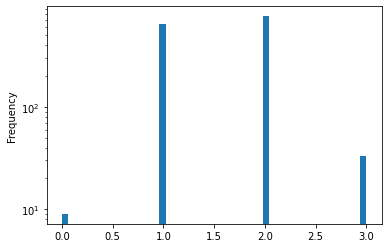

HalfBath


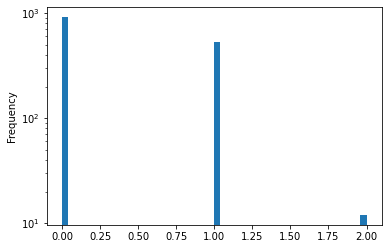

BedroomAbvGr


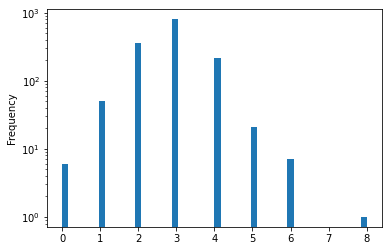

KitchenAbvGr


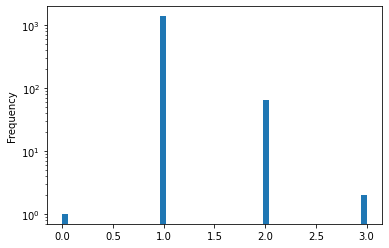

TotRmsAbvGrd


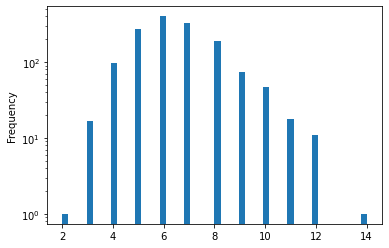

Fireplaces


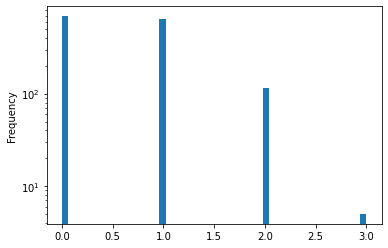

GarageCars


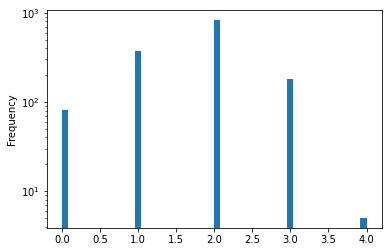

GarageArea


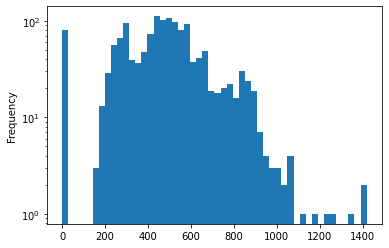

WoodDeckSF


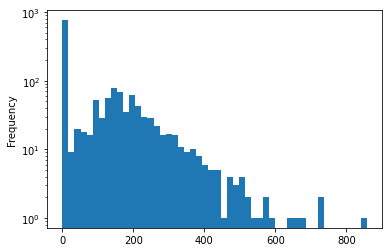

OpenPorchSF


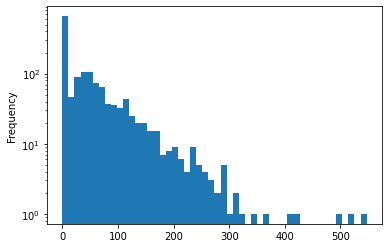

EnclosedPorch


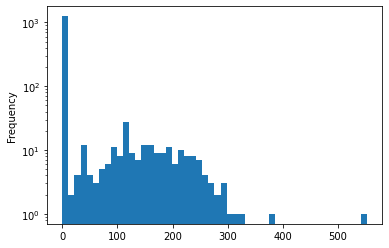

3SsnPorch


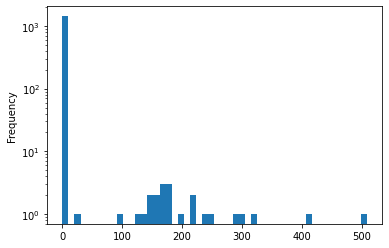

ScreenPorch


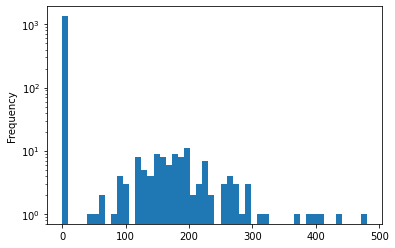

PoolArea


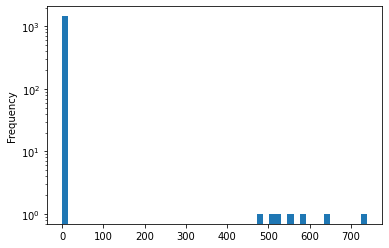

MiscVal


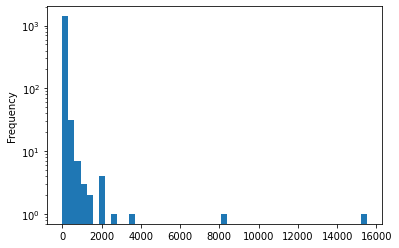

MoSold


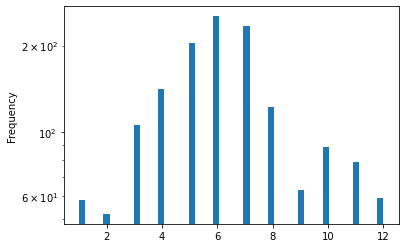

YrSold


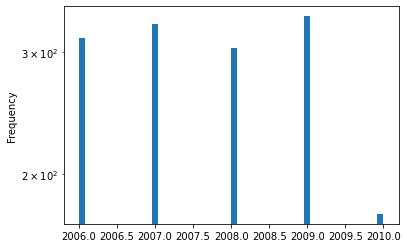

SalePrice


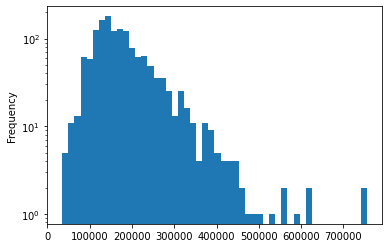

In [21]:
# Analise univariavel
for coluna in colunas_numericas:
    print(coluna)
    df[coluna].plot.hist(bins = 50, log= True)
    plt.show()

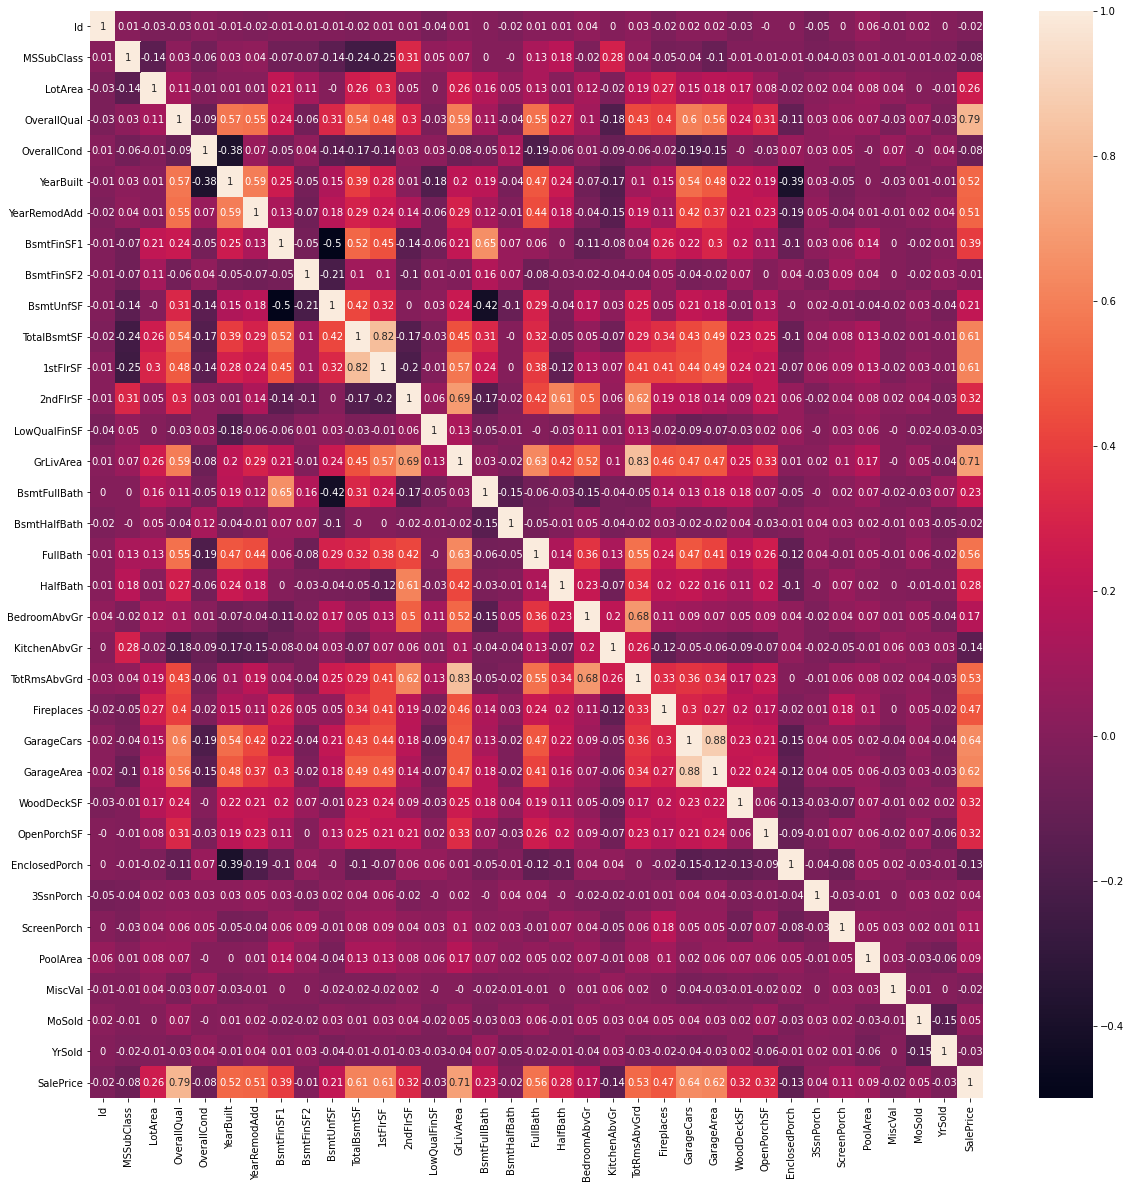

In [22]:
#Analisando a correlacao entre as variaveis númericas
plt.figure(figsize = (20,20))
sns.heatmap(df[colunas_numericas].corr().round(2), annot= True)

In [43]:
correlacionadas = ['GarageArea', 'GarageCars', 'GrLivArea', 'OverallQual']

## Analisando as features com yellowbrick

In [39]:
pip install yellowbrick

     |████████████████████████████████| 263 kB 969 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#Removendo a coluna ID
colunas_numericas.remove('Id')
df = df[colunas_numericas]

In [ ]:
y_train = df['SalePrice']
X_train = df.drop(columns = 'SalePrice')

/Users/tuliosouza/opt/anaconda3/envs/aceleradev_ds/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


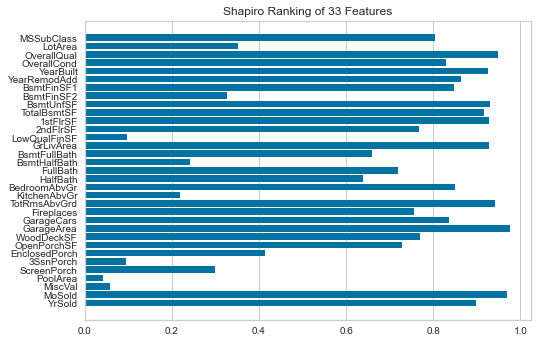

In [40]:
from yellowbrick.features import Rank1D

visualizer = Rank1D(algorithm='shapiro')

visualizer.fit(X_train, y_train)           
visualizer.transform(X_train)        
visualizer.show()              

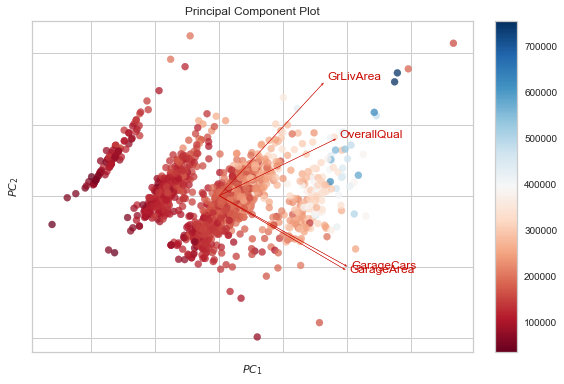

In [155]:
from yellowbrick.features import PCA


visualizer = PCA(scale=True, proj_features=True, projection=2)
visualizer.fit_transform(X_train[correlacionadas], y_train)
visualizer.show()

/Users/tuliosouza/opt/anaconda3/envs/aceleradev_ds/lib/python3.8/site-packages/sklearn/base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


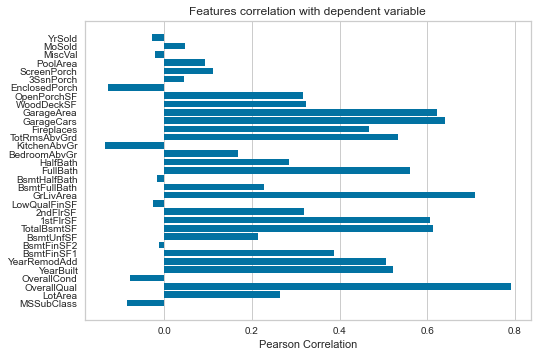

In [49]:
from yellowbrick.target import FeatureCorrelation

features = list(X_train.columns)

visualizer = FeatureCorrelation(labels=features)

visualizer.fit(X_train, y_train)        
visualizer.show()       

## Treinando o modelo

In [36]:
pip install sklearn

  Using cached sklearn-0.0.tar.gz (1.1 kB)
     |████████████████████████████████| 7.2 MB 6.5 MB/s eta 0:00:01
  Using cached joblib-0.14.1-py2.py3-none-any.whl (294 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1315 sha256=a06c24060e74cb4e85f9e51f5e3f55cf62c260de007fc4aedc7c860cdc0e3012
  Stored in directory: /Users/tuliosouza/Library/Caches/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [37]:
from sklearn.linear_model import LinearRegression

In [50]:
reg= LinearRegression()

In [51]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
colunas_treinamento = X_train.columns

In [55]:
X_test = pd.read_csv('test.csv')
y_test = pd.read_csv('sample_submission.csv')

In [67]:
y_test = y_test['SalePrice']

In [95]:
X_test= X_test[colunas_treinamento].fillna(df[colunas_treinamento].mean())

In [62]:
y_pred = reg.predict(X_test)

In [63]:
from sklearn.metrics import mean_squared_error

In [140]:
erro_normal = mean_squared_error(y_pred=y_pred, y_true=y_test)

In [156]:
erro_normal

4647194215.33722

## Aplicando o Feature Selection

In [73]:
from sklearn.feature_selection import RFE

In [74]:
rfe = RFE(reg)

In [75]:
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=None, step=1, verbose=0)

In [91]:
pd.DataFrame({'coluna':X_train.columns,
              'bool': rfe.get_support(),
              'coeficientes': pd.Series(reg.coef_)})

coluna   bool  coeficientes
0      MSSubClass   True   -162.672852
1         LotArea  False      0.396228
2     OverallQual   True  17905.067194
3     OverallCond   True   4418.794796
4       YearBuilt   True    346.653503
5    YearRemodAdd   True    137.073924
6      BsmtFinSF1  False     11.833598
7      BsmtFinSF2  False     -2.728260
8       BsmtUnfSF  False      0.787735
9     TotalBsmtSF  False      9.893072
10       1stFlrSF  False     18.837707
11       2ndFlrSF  False     18.946369
12   LowQualFinSF  False     -6.000309
13      GrLivArea  False     31.783767
14   BsmtFullBath   True   8534.894057
15   BsmtHalfBath   True   2467.200539
16       FullBath   True   3577.489051
17       HalfBath   True  -1326.861626
18   BedroomAbvGr   True -10530.779326
19   KitchenAbvGr   True -12927.769856
20   TotRmsAbvGrd   True   5132.318055
21     Fireplaces   True   3596.895112
22     GarageCars   True  10633.749904
23     GarageArea  False      1.396213
24     WoodDeckSF  False     26.372691
25    OpenPorchSF  False     -5.619397
26  EnclosedPorch  False      8.722010
27      3SsnPorch  False     18.771384
28    ScreenPorch  False     57.885991
29       PoolArea  False    -42.613687
30        MiscVal  False     -0.891248
31         MoSold   True   -115.348621
32         YrSold   True   -757.643913

In [96]:
X_train_importante = rfe.transform(X_train)
X_test_importante = rfe.transform(X_test)

In [98]:
reg.fit(X_train_importante, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
y_pred_imp = reg.predict(X_test_importante)

In [139]:
erro_imp = mean_squared_error(y_pred=y_pred_imp, y_true=y_test)

In [158]:
erro_imp

4628516097.925274

/Users/tuliosouza/opt/anaconda3/envs/aceleradev_ds/lib/python3.8/site-packages/sklearn/base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
/Users/tuliosouza/opt/anaconda3/envs/aceleradev_ds/lib/python3.8/site-packages/sklearn/base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


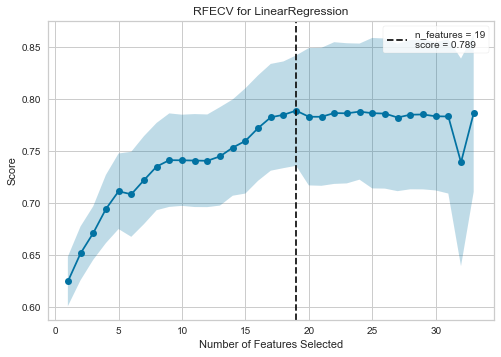

In [118]:
from yellowbrick.model_selection import RFECV


# Instantiate RFECV visualizer with a linear SVM classifier
visualizer = RFECV(reg)

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

## Aplicando PCA

In [121]:
from sklearn.decomposition import PCA

In [123]:
pca = PCA(0.95)

In [125]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [128]:
pca.explained_variance_ratio_

array([0.98511677])

In [131]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [136]:
reg = LinearRegression()
reg.fit(X_train_pca, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [137]:
y_pred_pca = reg.predict(X_test_pca)

In [141]:
erro_pca = mean_squared_error(y_pred=y_pred_pca, y_true=y_test)

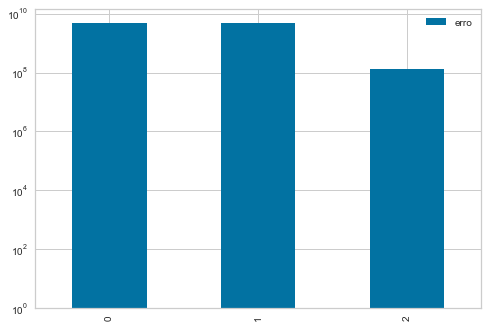

In [160]:
pd.DataFrame({'erro' : [erro_normal, erro_imp, erro_pca]}).plot(kind = 'bar', log = True)